Шкарбаненко Михаил Б05-879.

# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [ ]:
# If on colab, uncomment the following lines

! wget https://raw.githubusercontent.com/girafe-ai/ml-mipt/basic_s21/homeworks_basic/Lab1_ML_pipeline_and_SVM/car_data.csv

--2021-03-23 17:56:49--  https://raw.githubusercontent.com/girafe-ai/ml-mipt/basic_s21/homeworks_basic/Lab1_ML_pipeline_and_SVM/car_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58374 (57K) [text/plain]
Saving to: ‘car_data.csv.1’

car_data.csv.1      100%[===================>]  57.01K  --.-KB/s    in 0.01s   

2021-03-23 17:56:49 (4.84 MB/s) - ‘car_data.csv.1’ saved [58374/58374]



In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


In [ ]:
pd.read_csv('car_data.csv', delimiter=',', header=None).head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,van
1,1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,van
2,2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,saab
3,3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,van
4,4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,bus
5,5,107,57,106,172,50,6,255,26,28,169,280,957,264,85,5,9,181,183,bus
6,6,97,43,73,173,65,6,153,42,19,143,176,361,172,66,13,1,200,204,bus
7,7,90,43,66,157,65,9,137,48,18,146,162,281,164,67,3,3,193,202,van
8,8,86,34,62,140,61,7,122,54,17,127,141,223,112,64,2,14,200,208,van
9,9,93,44,98,197,62,11,183,36,22,146,202,505,152,64,4,14,195,204,saab


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [ ]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,549,107,51,103,182,56,11,213,31,24,162,226,673,217,72,2,4,188,198
1,275,87,44,70,179,75,6,146,45,19,141,167,326,178,69,6,1,194,201
2,712,105,45,100,195,61,10,198,33,23,149,214,586,186,67,8,5,192,200
3,701,108,49,103,200,62,10,206,32,23,155,227,635,215,72,6,16,189,198
4,30,89,43,85,160,64,11,155,43,19,151,173,356,174,72,5,9,185,196
5,417,96,36,74,183,70,6,149,43,19,127,178,341,127,69,0,17,201,205
6,471,104,55,109,230,67,12,218,30,24,174,230,706,226,67,8,22,191,202
7,552,90,39,89,181,62,8,175,38,21,132,200,458,154,70,11,15,189,195
8,702,96,48,83,177,59,8,171,39,21,152,195,438,196,67,15,0,195,201
9,0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197


Methods `describe` and `info` deliver some useful information.

In [ ]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,419.856102,93.695811,44.642987,82.069217,169.668488,61.941712,8.754098,168.479053,41.012750,20.551913,147.593807,188.690346,437.959927,173.537341,72.397086,6.336976,13.138434,189.100182,195.894353
std,241.100025,8.155223,6.188644,15.935853,34.051637,8.682365,5.253050,33.087283,7.848347,2.572230,14.502354,31.794773,175.065416,33.147934,8.084571,4.890528,9.113385,6.212991,7.494995
min,0.000000,76.000000,33.000000,40.000000,104.000000,48.000000,3.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,208.000000,88.000000,39.000000,70.000000,143.000000,57.000000,7.000000,146.000000,33.000000,19.000000,136.000000,168.000000,320.000000,147.000000,67.000000,2.000000,6.000000,184.000000,191.000000
50%,423.000000,93.000000,44.000000,80.000000,169.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,179.000000,363.000000,173.000000,71.000000,6.000000,12.000000,189.000000,197.000000
75%,620.000000,100.000000,49.000000,98.000000,195.000000,65.000000,10.000000,198.000000,46.000000,23.000000,159.000000,216.000000,586.000000,198.000000,75.000000,9.000000,20.000000,193.000000,201.000000
max,842.000000,119.000000,59.000000,112.000000,333.000000,138.000000,55.000000,260.000000,61.000000,28.000000,188.000000,320.000000,982.000000,268.000000,135.000000,22.000000,40.000000,206.000000,211.000000


In [ ]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int64
 1   1       549 non-null    int64
 2   2       549 non-null    int64
 3   3       549 non-null    int64
 4   4       549 non-null    int64
 5   5       549 non-null    int64
 6   6       549 non-null    int64
 7   7       549 non-null    int64
 8   8       549 non-null    int64
 9   9       549 non-null    int64
 10  10      549 non-null    int64
 11  11      549 non-null    int64
 12  12      549 non-null    int64
 13  13      549 non-null    int64
 14  14      549 non-null    int64
 15  15      549 non-null    int64
 16  16      549 non-null    int64
 17  17      549 non-null    int64
 18  18      549 non-null    int64
dtypes: int64(19)
memory usage: 81.6 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(np.concatenate((X_train, X_test)))
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

We should normalize dataset in logistic regression. Features with big scale will contribute the model more then features with the less one. I use StandardScaler to get rid of it .

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [ ]:
# You might use this command to install scikit-plot. 
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding 
# virtual environment instead

! pip install scikit-plot

Best parameters (CV score=0.792):
{'C': 0.9591836734693877, 'penalty': 'l1'}
['van' 'opel' 'bus' 'bus' 'van' 'opel' 'van' 'bus' 'saab' 'bus']
['van' 'opel' 'saab' 'bus' 'van' 'van' 'van' 'bus' 'saab' 'bus']
0.7676767676767676
f1 score:
0.7643834055846359
accuracy score:
0.7676767676767676


<Figure size 432x288 with 0 Axes>

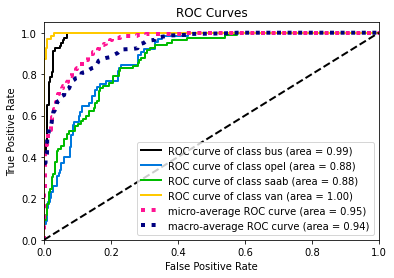

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from scikitplot.metrics import plot_roc
import matplotlib.pyplot as plt

def calc_scores(clf):
    y_predict = clf.predict(X_test[:10, :])

    print(y_predict)
    print(y_test[:10])

    score = clf.score(X_test, y_test)
    print(score)

    y_predict = clf.predict(X_test)
    f1_score_val = f1_score(y_test, y_predict, average="macro")
    print("f1 score:")
    print(f1_score_val)

    accuracy_score_val = accuracy_score(y_test, y_predict, normalize=True)
    print("accuracy score:")
    print(accuracy_score_val)

def show_roc(clf):
    y_probas = clf.predict_proba(X_test)

    plt.figure()
    subplot = plot_roc(y_test, y_probas)
    plt.subplot(subplot)
    plt.show()


alg = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500)
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': np.linspace(0, 1)
}
search = GridSearchCV(alg, param_grid, n_jobs=-1)
clf = search.fit(X_train, y_train)
print("Best parameters (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

calc_scores(clf)
show_roc(clf)

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

[4.75439134e-01 1.59042325e-01 1.27643632e-01 6.29103406e-02
 4.90445326e-02 4.51006979e-02 2.67204464e-02 1.89723118e-02
 1.16841757e-02 8.59881562e-03 4.58638480e-03 3.37727596e-03
 2.19268945e-03 1.74569685e-03 1.12673602e-03 8.40107099e-04
 6.49051698e-04 3.07734193e-04 1.79129024e-05]


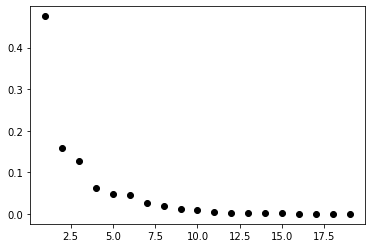

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_train)
print(pca.explained_variance_ratio_)

plt.figure()
x = np.linspace(1, 19, len(pca.explained_variance_ratio_))
plt.plot(x, pca.explained_variance_ratio_, 'o', color='black')
plt.show()

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

In [ ]:
pca = PCA(n_components=8)
pca.fit(X_train)

X_train_pc = pca.transform(X_train)
X_test_pc = pca.transform(X_test)

Looking on the plot in previous task we can see that ~8 components varience are valuable. We should normalize data before running PCA in order the feature varience be comparable.

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

Here we use first 8 largest pca components according previous plot.

['van' 'opel' 'bus' 'bus' 'bus' 'van' 'van' 'bus' 'opel' 'bus']
['van' 'opel' 'saab' 'bus' 'van' 'van' 'van' 'bus' 'saab' 'bus']
0.6026936026936027
[0.70857143 0.3880597  0.37878788 0.8627451 ]
179


<Figure size 432x288 with 0 Axes>

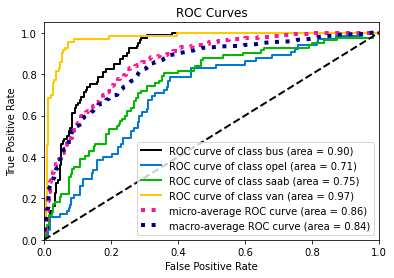

In [ ]:
clf = alg.fit(X_train_pc, y_train)
y_predict = clf.predict(X_test_pc[:10, :])

print(y_predict)
print(y_test[:10])

score = clf.score(X_test_pc, y_test)
print(score)

y_predict = clf.predict(X_test_pc)
f1_score_val = f1_score(y_test, y_predict, average=None)
print(f1_score_val)

accuracy_score_val = accuracy_score(y_test, y_predict, normalize=False)
print(accuracy_score_val)

y_probas = clf.predict_proba(X_test_pc)

plt.figure()
subplot = plot_roc(y_test, y_probas)
plt.subplot(subplot)
plt.show()

We can see that accuracy metrics decreased. Now let's find optimal pca n_components and other parameters using GridSearch.

Best parameters (CV score=0.798):
{'logisticregression__C': 0.9795918367346939, 'logisticregression__max_iter': 250, 'logisticregression__penalty': 'l1', 'pca__n_components': 18}
['van' 'opel' 'bus' 'bus' 'van' 'opel' 'van' 'bus' 'saab' 'bus']
['van' 'opel' 'saab' 'bus' 'van' 'van' 'van' 'bus' 'saab' 'bus']
0.7676767676767676
f1 score:
0.7649198844234305
accuracy score:
0.7676767676767676


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


<Figure size 432x288 with 0 Axes>

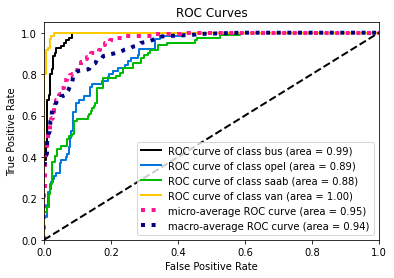

In [ ]:
from sklearn.pipeline import make_pipeline

alg = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3)
pca_alg = make_pipeline(PCA(), alg)

param_grid = {
    'pca__n_components': range(1, 19),
    'logisticregression__penalty': ['l1', 'l2'],
    'logisticregression__max_iter': [250, 500, 1000],
    'logisticregression__C': np.linspace(0, 1)
}
search = GridSearchCV(pca_alg, param_grid, n_jobs=-1)
clf = search.fit(X_train, y_train)
print("Best parameters (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

calc_scores(clf)
show_roc(clf)

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

Best parameters (CV score=0.694):
{'max_depth': 20}
['van' 'saab' 'opel' 'bus' 'opel' 'saab' 'van' 'bus' 'saab' 'saab']
['van' 'opel' 'saab' 'bus' 'van' 'van' 'van' 'bus' 'saab' 'bus']
0.6767676767676768
f1 score:
0.6758944486885663
accuracy score:
0.6767676767676768


<Figure size 432x288 with 0 Axes>

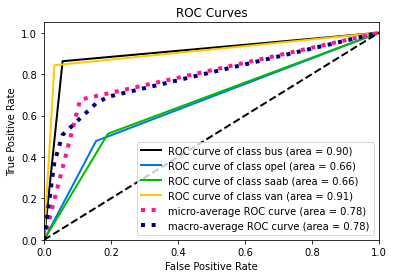

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# YOUR CODE HERE
alg = DecisionTreeClassifier(random_state=0)
param_grid = {
    'max_depth': [10, 20, 30, 50, 100, 200, 300, 400, 500, 1000],
}
search = GridSearchCV(alg, param_grid, n_jobs=-1)
clf = search.fit(X_train, y_train)
print("Best parameters (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

calc_scores(clf)
show_roc(clf)

Optimal depth of decision tree is 20.

#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the 

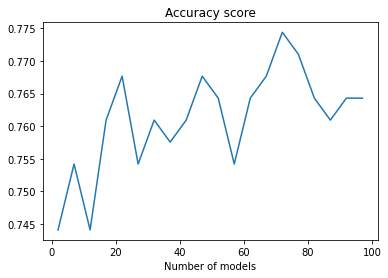

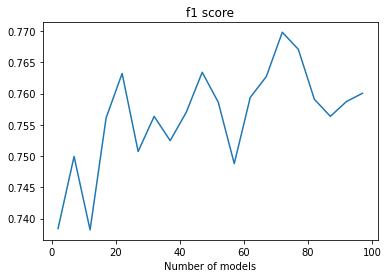

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

log = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500)
f1 = []
accuracy = []
for i in np.arange(2, 100, 5):
    bag_log = BaggingClassifier(log, n_estimators=i, max_samples=0.8, max_features=1.0)
    clf = bag_log.fit(X_train, y_train)
    y_predict = clf.predict(X_test)
    f1_score_val = f1_score(y_test, y_predict, average="macro")
    f1.append(f1_score_val)
    accuracy_score_val = accuracy_score(y_test, y_predict, normalize=True)
    accuracy.append(accuracy_score_val)

plt.figure()
plt.title("Accuracy score")
plt.xlabel('Number of models')
plt.plot(np.arange(2, 100, 5), accuracy)
plt.show()

plt.figure()
plt.title("f1 score")
plt.xlabel('Number of models')
plt.plot(np.arange(2, 100, 5), f1)
plt.show()

~33 n_estimators is optimal parameter. Since the models in ensemble are similar the accuracy is jumping around some mean value. It's not good because accuracy doesn't rise with number of models.


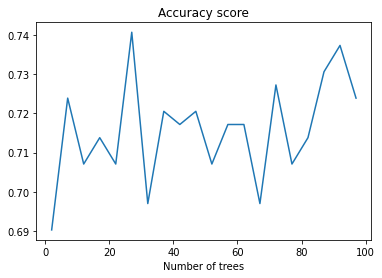

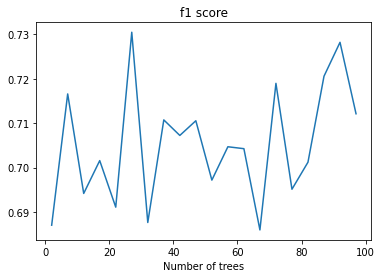

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

tree = DecisionTreeClassifier()
f1 = []
accuracy = []
for i in np.arange(2, 100, 5):
    bag_tree = BaggingClassifier(tree, n_estimators=i, max_samples=0.8, max_features=1.0)
    clf = bag_tree.fit(X_train, y_train)
    y_predict = clf.predict(X_test)
    f1_score_val = f1_score(y_test, y_predict, average="macro")
    f1.append(f1_score_val)
    accuracy_score_val = accuracy_score(y_test, y_predict, normalize=True)
    accuracy.append(accuracy_score_val)

plt.figure()
plt.title("Accuracy score")
plt.xlabel('Number of trees')
plt.plot(np.arange(2, 100, 5), accuracy)
plt.show()

plt.figure()
plt.title("f1 score")
plt.xlabel('Number of trees')
plt.plot(np.arange(2, 100, 5), f1)
plt.show()

~20 n_estimators is optimal parameter. Accuracy isn't improved significantly after 20 trees. The parameters found in 2.5 shouldn't be optimal for trees in ensemble because ensemle work best with different overtrained models.

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

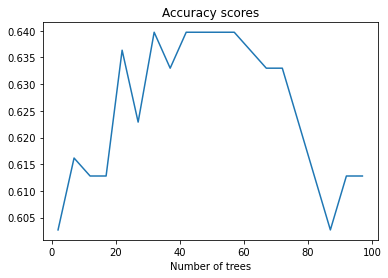

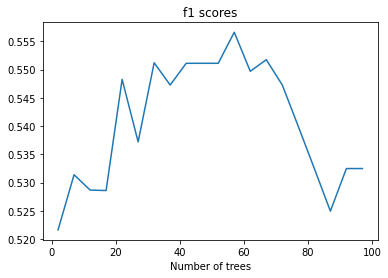

In [ ]:
from sklearn.ensemble import RandomForestClassifier

f1 = []
accuracy = []
for i in np.arange(2, 100, 5):
    rf = RandomForestClassifier(max_depth=2, n_estimators=i, random_state=0)
    clf = rf.fit(X_train, y_train)
    y_predict = clf.predict(X_test)
    f1_score_val = f1_score(y_test, y_predict, average="macro")
    f1.append(f1_score_val)
    accuracy_score_val = accuracy_score(y_test, y_predict, normalize=True)
    accuracy.append(accuracy_score_val)

plt.figure()
plt.title("Accuracy scores")
plt.xlabel('Number of trees')
plt.plot(np.arange(2, 100, 5), accuracy)
plt.show()

plt.figure()
plt.title("f1 scores")
plt.xlabel('Number of trees')
plt.plot(np.arange(2, 100, 5), f1)
plt.show()

We've got the similar optimal results with ensemble of desision trees in 2.6. It's similar because in both cases we use randomization for building different tree models. But as you can see in this case RandomForest is a bit better.

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

In [ ]:
import math
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

log = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500, C=1, penalty='l1')
tree = DecisionTreeClassifier(random_state=0, max_depth=20)
rf = RandomForestClassifier(random_state=0, n_estimators=50)

parts_N = 10
part_size = math.ceil(len(y_train)/parts_N)
accuracy = []
f1 = []
for train_len in range(part_size, len(y_train), part_size):
    clf_log = log.fit(X_test[:train_len, :], y_test[:train_len])
    y_predict = clf_log.predict(X_test)
    log_score = accuracy_score(y_test, y_predict, normalize=True)
    f1_log = f1_score(y_test, y_predict, average="macro")
    clf_tree = tree.fit(X_test[:train_len, :], y_test[:train_len])
    y_predict = clf_tree.predict(X_test)
    tree_score = accuracy_score(y_test, y_predict, normalize=True)
    f1_tree = f1_score(y_test, y_predict, average="macro")
    clf_rf = rf.fit(X_test[:train_len, :], y_test[:train_len])
    y_predict = clf_rf.predict(X_test)
    rf_score = accuracy_score(y_test, y_predict, normalize=True)
    f1_rf = f1_score(y_test, y_predict, average="macro")
    accuracy.append([log_score, tree_score, rf_score])
    f1.append([f1_log, f1_tree, f1_rf])

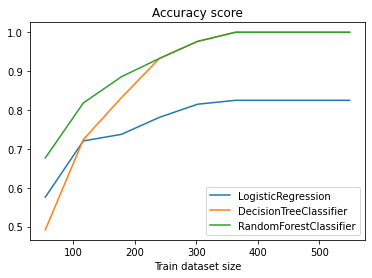

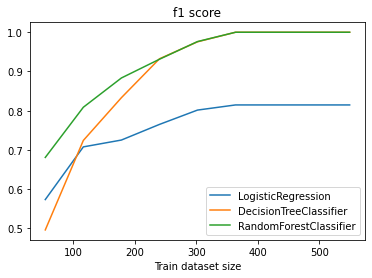

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
x = np.linspace(part_size, len(y_train), parts_N-1)
plt.title("Accuracy score")
plt.xlabel('Train dataset size')
plt.plot(x, accuracy)
plt.legend(["LogisticRegression", "DecisionTreeClassifier", "RandomForestClassifier"])
plt.show()

plt.figure()
x = np.linspace(part_size, len(y_train), parts_N-1)
plt.title("f1 score")
plt.xlabel('Train dataset size')
plt.plot(x, f1)
plt.legend(["LogisticRegression", "DecisionTreeClassifier", "RandomForestClassifier"])
plt.show()

Accuracy reaches the maximum at ~500 points. We can reduce a train set size.